In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2023-12-08 / Aki Taanila


# Matplotlib - osa 1
## Yksinkertainen pylväskaavio

* Jos käytän pandas-kirjastoa, niin voin tehdä kaavion suoraan dataframesta plot-funktiolla. Käytettävissä on monia kaavioon vaikuttavia parametreja: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
* Kaavion luonnin jälkeen voin muotoilla ja täydentää kaaviota **matplotlib.pyplot**-paketin komennoilla. Lue lisää https://matplotlib.org/stable/tutorials/pyplot.html ja https://matplotlib.org/stable/api/pyplot_summary.html
* Joissain tapauksissa tarvitaan kaavion luonnin palauttamaa **Axes**-luokan oliota kaavion muotoiluun. Lue lisää https://matplotlib.org/stable/api/axes_api.html

**Seaborn** on matplotlibin päälle rakennettu paketti, joka tekee monista vaikeista asioista helppoja. Tässä muistiossa en käytä sitä muuuhun kuin grafiikan tyylimäärittelyyn.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grafiikan tyylimäärittely, joka sisältää taustaviivoitukset (grid)
# Muita tyylivaihtoehtoja ovat 'darkgrid', 'dark', 'white' ja 'ticks'
sns.set_style('whitegrid')

In [3]:
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN


In [4]:
# Lasken eri koulutuksen suorittaneiden lukumäärät
df1 = pd.crosstab(df['koulutus'], 'lkm')
df1.index = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
df1.columns.name = ''
df1

,lkm
Peruskoulu,27
2. aste,30
Korkeakoulu,22
Ylempi korkeakoulu,2


## Vaakapylväskaavio

Teen äsken luomastani dataframesta vaakapylväskaavion **plot**-funktiolla. Plot-funktiolla voin luoda eri kaaviolajeja, esimerkiksi pystypylväskaavion **bar** tai vaakapylväskaavion **barh**.

<Axes: >

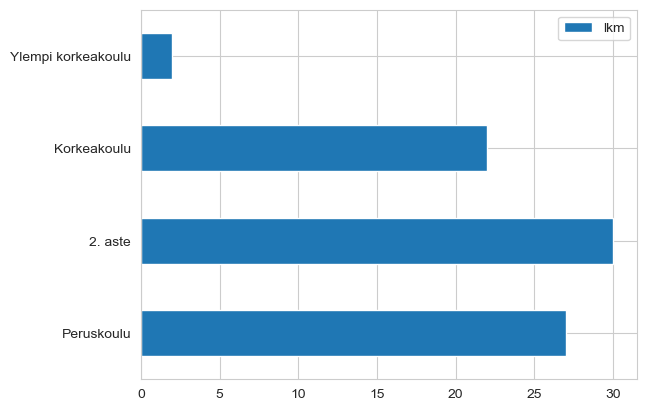

In [5]:
df1.plot(kind='barh')

## Kaavion muotoilua

* Mielestäni yhden arvosarjan kaavioissa selite on tarpeeton, joten piilotan sen **legend**-parametrilla
* Kaavion otsikoksi (**title**) annan 'Koulutusjakauma'
* Arvoakselin otsikoksi (**xlabel**) annan 'Lukumäärä'
* Poistan tyylimäärittelystä tulleen vaakasuuntaisen taustaviivoituksen (**grid**)

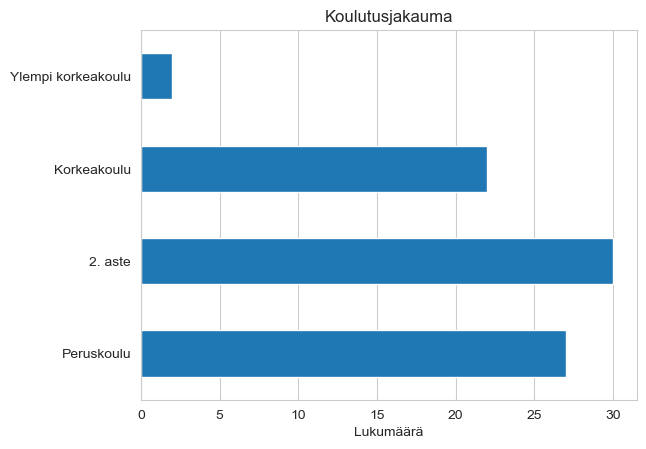

In [6]:
df1.plot(kind='barh', legend=False)

plt.title('Koulutusjakauma')
plt.xlabel('Lukumäärä')
plt.grid(axis='y')

## Hienosäätöä

* Tallennan kaavion ax-muuttujaan, jotta voin viitata siihen myöhemmin
* Määritän koon **figsize**-parametrilla
* Lisään pylväiden pituuksia vastaavat lukumäärät pylväiden viereen **bar_label**-funtiolla
* Käytän apuna **for**-silmukkaa, jolla käyn läpi kaavion pylväät **containers**-kokoelmasta yksi kerrallaan
* **padding**-parametrilla lisään tyhjää tilaa pylvään ja arvon väliin

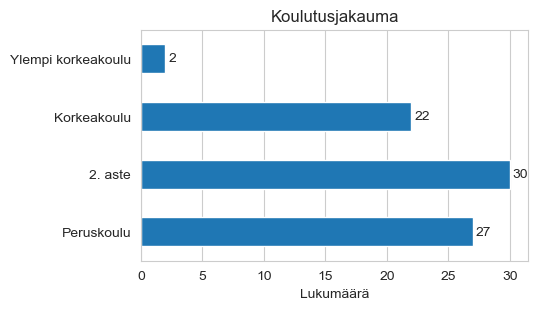

In [7]:
ax = df1.plot(kind='barh', figsize=(5, 3), legend=False)

plt.title('Koulutusjakauma')
plt.xlabel('Lukumäärä')
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, padding=2)

## Pystypylväskaavio

Pienin muutoksin voin toteuttaa edellisen pystypylväskaaviona.

Huomaa luokka-akselin otsikoiden 0 asteen kääntö (**rot**) ja pysty-akselin rajojen määritys (**ylim**).

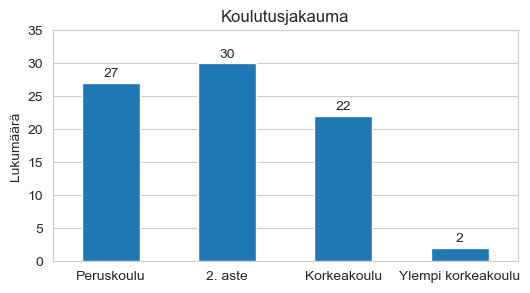

In [8]:
ax = df1.plot(kind='bar', figsize=(6, 3), legend=False, rot=0)

plt.title('Koulutusjakauma')
plt.ylabel('Lukumäärä')
plt.grid(axis='x')
plt.ylim(0, 35)

for container in ax.containers:
    ax.bar_label(container, padding=2)

## Prosenttien esittäminen

In [9]:
# Luon dataframen, jossa prosentit
df2 = pd.crosstab(df['koulutus'], 'f')
df2['%'] = df2['f'] / df2['f'].sum() * 100
df2.index = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
df2.columns.name = ''
df2

,f,%
Peruskoulu,27,33.333333
2. aste,30,37.037037
Korkeakoulu,22,27.160494
Ylempi korkeakoulu,2,2.469136


### n-arvo

Kirjoitan x-akselin otsikon muotoiltuna merkkijonona (**f-string**). Muotoillussa merkkijonossa voin aaltosulkujen sisällä viitata muuttujan arvoon tai laskutoimituksen tulokseen. Tässä tapauksessa lasken df2:n f-sarakkeen lukujen summan ja muunnan tuloksen merkkijonoksi **str**-funktiolla. Jos mutoiltu merkkijono on heittomerkkien välissä, niin en voi käyttää heittomerkkejä merkkijonon sisällä. Sen sijaan voin käyttää lainausmerkkejä. Toisinpäin: jos muotoiltu merkkijono on lainausmerkkien välissä, niin merkkijonon sisällä pitää käyttää heittomerkkejä lainausmerkkien sijasta.

### Prosenttilukujen muotoilu

Muotoilen pylväiden viereen sijoitettavat prosenttiluvut muotoilukoodilla **'{:.1f} %'** prosenttiluvuiksi yhdellä desimaalilla.

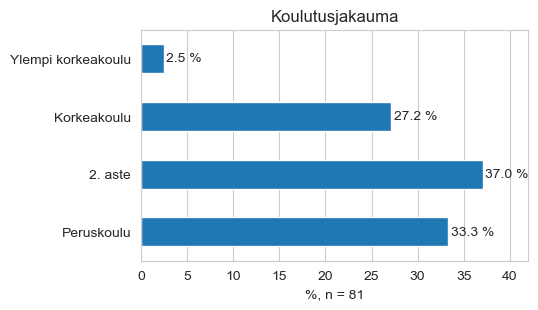

In [10]:
ax = df2['%'].plot(kind='barh', figsize=(5, 3))

plt.title('Koulutusjakauma')
plt.xlabel(f'%, n = {str(df2["f"].sum())}')
plt.grid(axis='y')
plt.xlim(0, 42)

for container in ax.containers:
    ax.bar_label(container, padding=2, fmt='{:.1f} %')

## Kaavion tallennus

Kun tallennan kaavion **savefig**-funktiolla, niin tarkkaan ottaen tallennan kuvion (**figure**), jonka sisällä kaavio on. Kuvioon pääsen käsiksi **plt.gcf**-funktiolla (get current figure).

Ilman parametria `bbox_inches='tight'` osia kaavion reunoilta voi jäädä tallentumatta.

Tallennusmuoto määräytyy  tiedostonimen tarkentimen (esimerkiksi .png) perusteella. Mahdolliset tallennusmuodot selviävät komennolla `plt.gcf().canvas.get_supported_filetypes()`

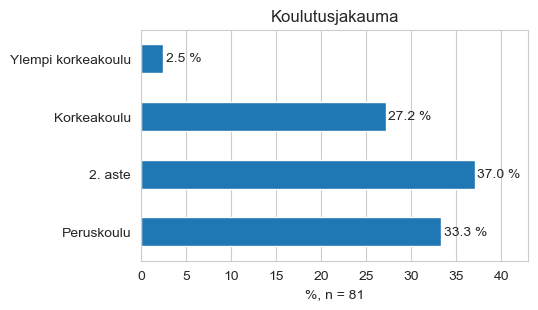

In [11]:
ax = df2['%'].plot(kind='barh', figsize=(5, 3))

plt.title('Koulutusjakauma')
plt.xlabel(f'%, n = {str(df2["f"].sum())}')
plt.grid(axis='y')
plt.xlim(0, 43)

for container in ax.containers:
    ax.bar_label(container, padding=2, fmt='{:.1f} %')

# Tallennus
plt.gcf().savefig('testi1.png', bbox_inches='tight')

## Lisätietoa

Matplotlib - osa 2 käsittelee useamman arvosarjan pylväskaavioita:
https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib2.ipynb